In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

%matplotlib inline

### ~ Логическая регрессия

In [3]:
DATASET_PATH = './datasets/titanic/train.csv'  
data = pd.read_csv(DATASET_PATH, index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# target --> Survived

In [5]:
target = 'Survived'

y = data['Survived']
X = data.drop(columns=['Survived'])

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [7]:
X.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

In [8]:
X['Age'].fillna(X['Age'].mean(), inplace=True)

In [9]:
X['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
X['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
X['Embarked'].fillna('S', inplace=True)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [13]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
sex_map = {
    'female': 0,
    'male': 1
}

X['Sex'] = X['Sex'].map(sex_map)
X['Sex'].head()

PassengerId
1    1
2    0
3    0
4    0
5    1
Name: Sex, dtype: int64

In [15]:
X = pd.get_dummies(X)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,1,22.000000,1,0,7.2500,0,0,1
2,1,0,38.000000,1,0,71.2833,1,0,0
3,3,0,26.000000,0,0,7.9250,0,0,1
4,1,0,35.000000,1,0,53.1000,0,0,1
5,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
887,2,1,27.000000,0,0,13.0000,0,0,1
888,1,0,19.000000,0,0,30.0000,0,0,1
889,3,0,29.699118,1,2,23.4500,0,0,1


In [16]:
X['Pclass'] = X['Pclass'].astype('category')

In [17]:
X = pd.get_dummies(X)

In [18]:
X.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
1,1,22.0,1,0,7.2500,0,0,1,0,0,1
2,0,38.0,1,0,71.2833,1,0,0,1,0,0
3,0,26.0,0,0,7.9250,0,0,1,0,0,1
4,0,35.0,1,0,53.1000,0,0,1,1,0,0
5,1,35.0,0,0,8.0500,0,0,1,0,0,1


### ~ Тренировочный, валидационный и тестовый датасеты

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

In [23]:
from sklearn.metrics import accuracy_score as asc

In [24]:
asc(y_valid, y_pred)

0.8026905829596412

In [25]:
y_pred_train = lr.predict(X_train)

In [26]:
asc(y_train, y_pred_train)

0.8098802395209581

In [27]:
y_predict_proba = lr.predict_proba(X_valid)
y_predict_proba[:10]

array([[0.88481218, 0.11518782],
       [0.73211766, 0.26788234],
       [0.87114406, 0.12885594],
       [0.10052182, 0.89947818],
       [0.26677609, 0.73322391],
       [0.08524538, 0.91475462],
       [0.34867249, 0.65132751],
       [0.90497419, 0.09502581],
       [0.26664551, 0.73335449],
       [0.11505878, 0.88494122]])

### Сохранение данных

In [28]:
X_train.to_pickle('./models/titanic/X_train.pkl')
y_train.to_pickle('./models/titanic/y_train.pkl')

X_valid.to_pickle('./models/titanic/X_valid.pkl')
y_valid.to_pickle('./models/titanic/y_valid.pkl')

### ~ Support Vector Machine

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [30]:
# номализация

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [31]:
clf = SVC(gamma='auto')

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
y_pred_train = clf.predict(X_train)

In [32]:
asc(y_valid, y_pred)

0.7847533632286996

In [33]:
asc(y_train, y_pred_train)

0.7874251497005988

#### Тюнинг модели SVC

In [34]:
c_values = np.logspace(-2, 5, 36)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(c_values):
    clf = SVC(C=value, gamma='auto')
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = asc(y_valid, y_pred)
    acc_train = asc(y_train, y_pred_train)
    
    if i % 5 == 0:
        print(f'C = {value}')
        print(f'acc_valid = {acc_valid}')
        print(f'acc_train = {acc_train}')
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

C = 0.01
acc_valid = 0.600896860986547
acc_train = 0.6212574850299402
C = 0.1
acc_valid = 0.7847533632286996
acc_train = 0.7874251497005988
C = 1.0
acc_valid = 0.7847533632286996
acc_train = 0.7874251497005988
C = 10.0
acc_valid = 0.8071748878923767
acc_train = 0.812874251497006
C = 100.0
acc_valid = 0.8161434977578476
acc_train = 0.8203592814371258
C = 1000.0
acc_valid = 0.8251121076233184
acc_train = 0.8368263473053892
C = 10000.0
acc_valid = 0.8340807174887892
acc_train = 0.8473053892215568
C = 100000.0
acc_valid = 0.8071748878923767
acc_train = 0.8592814371257484


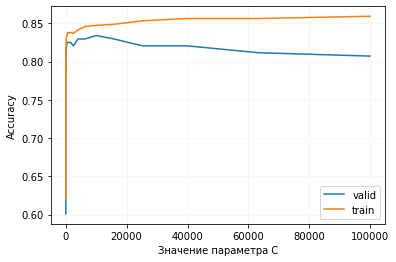

In [35]:
plt.plot(c_values, accuracy_on_valid, label='valid')
plt.plot(c_values, accuracy_on_train, label='train')

plt.xlabel('Значение параметра C')
plt.ylabel('Accuracy')

plt.grid(color='lavenderblush')
plt.legend()

plt.show()

### ~ KNN (_K Nearest Neighbours_ или _K ближайших соседей_)

#### Масштабирование признаков с использованием RobustScaler

In [36]:
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=42)

scaler = RobustScaler()
cols_for_scaling = ['Age', 'SibSp', 'Parch', 'Fare']

X_train[cols_for_scaling] = scaler.fit_transform(X_train[cols_for_scaling])
X_valid[cols_for_scaling] = scaler.transform(X_valid[cols_for_scaling])

In [38]:
X_train[cols_for_scaling].describe()

,Age,SibSp,Parch,Fare
count,668.000000,668.000000,668.000000,668.000000
mean,-0.017145,0.553892,0.372754,0.787570
std,1.000766,1.185279,0.795588,2.285892
min,-2.252240,0.000000,0.000000,-0.637874
25%,-0.592240,0.000000,0.000000,-0.286822
50%,0.000000,0.000000,0.000000,0.000000
75%,0.407760,1.000000,0.000000,0.713178
max,3.869299,8.000000,6.000000,22.056664


#### Классификация с помощью KNN

In [39]:
k_values = np.arange(1, 11)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = asc(y_valid, y_pred)
    acc_train = asc(y_train, y_pred_train)
    
    if i % 2 == 0:
        print(f'K = {value}')
        print(f'acc_valid = {acc_valid}')
        print(f'acc_train = {acc_train}')
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 1
acc_valid = 0.7713004484304933
acc_train = 0.9820359281437125
K = 3
acc_valid = 0.8161434977578476
acc_train = 0.8727544910179641
K = 5
acc_valid = 0.8071748878923767
acc_train = 0.8637724550898204
K = 7
acc_valid = 0.7847533632286996
acc_train = 0.8323353293413174
K = 9
acc_valid = 0.7802690582959642
acc_train = 0.8173652694610778


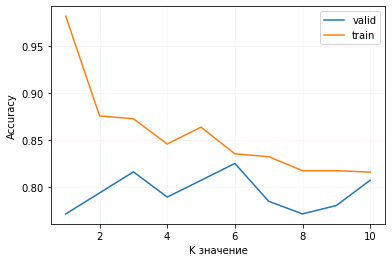

In [40]:
plt.plot(k_values, accuracy_on_valid, label='valid')
plt.plot(k_values, accuracy_on_train, label='train')

plt.xlabel('K значение')
plt.ylabel('Accuracy')

plt.legend()
plt.grid(color='lavenderblush')

plt.show()

In [41]:
# K == 6 --> optimal

In [42]:
clf = KNeighborsClassifier(n_neighbors=6)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)
y_pred_train = clf.predict(X_train)

print(asc(y_valid, y_pred))
print(asc(y_train, y_pred_train))

0.8251121076233184
0.8353293413173652


### ~ Метрика качества классификационных моделей

In [43]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

print(cm)

[[123  11]
 [ 28  61]]


In [44]:
TP = ((y_pred == 1) & (y_valid == 1)).sum()
TP

61

In [45]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

#### Точность и полнота

In [46]:
# precision

precision = TP / (TP + FP)
precision

0.8472222222222222

In [47]:
from sklearn.metrics import precision_score

ps = precision_score(y_valid, y_pred)
ps

0.8472222222222222

In [48]:
# recall(полнота)

recall = TP / (TP + FN)
recall

0.6853932584269663

In [49]:
from sklearn.metrics import recall_score

rs = recall_score(y_valid, y_pred)
rs

0.6853932584269663

#### F-мера

F1 = 2 * (precision * recall) / (precision + recall)

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(y_valid, y_pred)

0.7577639751552795

#### AUC (area under curve)

In [52]:
y_pred_proba = clf.predict_proba(X_valid)[:, 1]
y_pred_proba[:5]

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ])

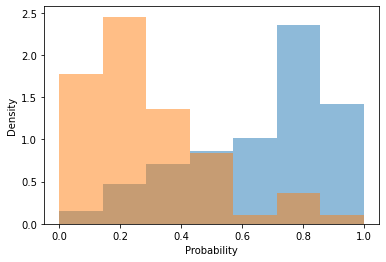

In [53]:
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, label='class 1', alpha=.5)
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, label='class 0', alpha=.5)

plt.xlabel('Probability')
plt.ylabel('Density')

plt.show()

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label = 1) 

In [55]:
th = thresholds[3]
th

0.6666666666666666

In [56]:
print(fpr[3])
print(tpr[3])

0.08208955223880597
0.6853932584269663


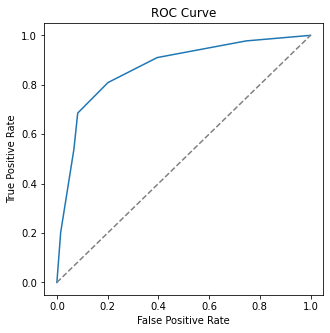

In [57]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_pred_proba)

0.8679356028844541

### ~ Деревья решений и случайный лес

#### Деревья решений

In [59]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=42)

In [60]:
max_depth_values = np.arange(2, 20)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    
    acc_valid = asc(y_valid, y_pred)
    acc_train = asc(y_train, y_pred_train)
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)
    
    if i % 4 == 0:
        print(f'K == {value}')
        print(f'acc_valid = {acc_valid}')
        print(f'acc_train = {acc_train}')

K == 2
acc_valid = 0.7757847533632287
acc_train = 0.8023952095808383
K == 6
acc_valid = 0.7713004484304933
acc_train = 0.8577844311377245
K == 10
acc_valid = 0.7354260089686099
acc_train = 0.9341317365269461
K == 14
acc_valid = 0.7399103139013453
acc_train = 0.9760479041916168
K == 18
acc_valid = 0.7309417040358744
acc_train = 0.9820359281437125


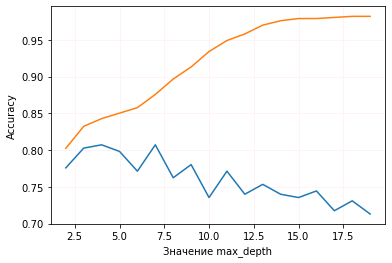

In [61]:
plt.figure(figsize=(6, 4))

plt.plot(max_depth_values, accuracy_on_valid, label='valid')
plt.plot(max_depth_values, accuracy_on_train, label='train')

plt.xlabel('Значение max_depth')
plt.ylabel('Accuracy')
plt.grid(color='lavenderblush')
plt.show()

In [62]:
# max_depth = 7 --> optimal

In [63]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
acc_valid = asc(y_valid, y_pred)
acc_valid

0.8116591928251121

#### Random Forest (Случайный лес)

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {
    'n_estimators': [150, 200, 350],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10)
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5
)

In [67]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': array([5, 6, 7, 8]),
                         'n_estimators': [150, 200, 350]},
             scoring='accuracy')

In [68]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [69]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_') 
]

param_columns
score_columns = ['mean_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score
20,6,7,350,0.829312
40,8,6,200,0.827853
10,5,8,200,0.827842
17,6,6,350,0.827820
1,5,5,200,0.826327
21,6,8,150,0.824846
15,6,6,150,0.824846
4,5,6,200,0.824834
16,6,6,200,0.824834
2,5,5,350,0.824823


In [70]:
clf.best_params_

{'max_depth': 6, 'max_features': 7, 'n_estimators': 350}

In [71]:
clf = RandomForestClassifier(max_depth=6, max_features=6, n_estimators=150)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
asc(y_valid, y_pred)

0.8116591928251121